In [ ]:
# Instale e carregue o pacote readr
if (!requireNamespace("readr", quietly = TRUE)) {
  install.packages("readr")
}
library(readr)

# URL do arquivo CSV no GitHub
url <- "https://raw.githubusercontent.com/filipezabala/pucrs-tecnologo-bd/main/dados/Anexo_Projeto_fifa_world_national_teams_versa%CC%83o_oficial%2020241.csv"

# Carrega o arquivo CSV com readr e define a codificação correta
fifa <- read_csv2(url, locale = locale(encoding = "ISO-8859-1"))

# Verifique a estrutura e exiba as primeiras linhas
str(fifa)
head(fifa)


ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Rows: 718 Columns: 30
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr  (5): name, full_name, nationality, national_team, club_team
dbl (25): id, overall_rating, value_euro, wage_euro, age, height_cm, weight_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


spc_tbl_ [718 × 30] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ id                           : num [1:718] 158023 153079 211110 201399 226226 ...
 $ name                         : chr [1:718] "Messi" "Aguero" "Dybala" "Icardi" ...
 $ full_name                    : chr [1:718] "Lionel Andrés Messi Cuccittini" "Sergio Leonel Agüero del Castillo" "Paulo Bruno Exequiel Dybala" "Mauro Emanuel Icardi Rivero" ...
 $ overall_rating               : num [1:718] 94 89 89 87 82 77 77 78 79 79 ...
 $ value_euro                   : num [1:718] 1.10e+08 6.45e+07 8.90e+07 6.45e+07 3.00e+07 ...
 $ wage_euro                    : num [1:718] 565000 300000 205000 130000 83000 28000 27000 53000 19000 54000 ...
 $ nationality                  : chr [1:718] "Argentina" "Argentina" "Argentina" "Argentina" ...
 $ national_team                : chr [1:718] "Argentina" "Argentina" "Argentina" "Argentina" ...
 $ club_team                    : chr [1:718] "FC Barcelona" "Manchester City" "Juventus" "Inter" ...
 $ a

id,name,full_name,overall_rating,value_euro,wage_euro,nationality,national_team,club_team,age,⋯,crossing,finishing,heading_accuracy,short_passing,dribbling,jumping,strength,long_shots,aggression,GK_reflexes
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
158023,Messi,Lionel Andrés Messi Cuccittini,94,110500000,565000,Argentina,Argentina,FC Barcelona,31,⋯,86,95,70,92,97,68,66,94,48,8
153079,Aguero,Sergio Leonel Agüero del Castillo,89,64500000,300000,Argentina,Argentina,Manchester City,30,⋯,70,93,77,81,89,81,73,83,65,14
211110,Dybala,Paulo Bruno Exequiel Dybala,89,89000000,205000,Argentina,Argentina,Juventus,25,⋯,82,84,68,87,92,75,65,88,48,8
201399,Icardi,Mauro Emanuel Icardi Rivero,87,64500000,130000,Argentina,Argentina,Inter,26,⋯,46,91,91,73,77,94,76,70,56,9
226226,Lo Celso,Giovani Lo Celso,82,30000000,83000,Argentina,Argentina,Real Betis,22,⋯,75,77,59,82,84,64,69,76,65,14
199667,Funes Mori,José Ramiro Funes Mori,77,8500000,28000,Argentina,Argentina,Villarreal CF,28,⋯,66,40,79,70,63,77,78,56,83,7


### 1. Calculation of Conditional and Unconditional Probabilities for at Least Two Selected Variables

- **Probability of a player being from Argentina**: **2.37%**
- **Probability of a player being from Argentina given that they play for FC Barcelona**: **9.09%**


In [ ]:
# Probabilidade incondicional: proporção de jogadores da Argentina
prob_argentina <- sum(fifa$nationality == "Argentina") / nrow(fifa)
cat("Probabilidade de um jogador ser da Argentina:", round(prob_argentina * 100, 2), "%\n")

# Probabilidade condicional: proporção de jogadores do FC Barcelona que são da Argentina
prob_arg_fc_barcelona <- sum(fifa$nationality == "Argentina" & fifa$club_team == "FC Barcelona") /
                         sum(fifa$club_team == "FC Barcelona")
cat("Probabilidade de um jogador ser da Argentina dado que joga no FC Barcelona:", round(prob_arg_fc_barcelona * 100, 2), "%\n")



Probabilidade de um jogador ser da Argentina: 2.37 %
Probabilidade de um jogador ser da Argentina dado que joga no FC Barcelona: 9.09 %


### 2. Confidence Intervals and Their Interpretation for at Least Two Selected Variables

- **95% Confidence Interval for the mean Overall Rating**: **[76.02, 76.9]**
- **95% Confidence Interval for the mean Age**: **[26.3, 26.83]**

In [ ]:
# Intervalo de confiança para a média de overall_rating (Classificação Geral)
conf_int_overall <- t.test(fifa$overall_rating, conf.level = 0.95)$conf.int
cat("Intervalo de confiança de 95% para a média de Overall Rating: [",
    round(conf_int_overall[1], 2), ",", round(conf_int_overall[2], 2), "]\n")

# Intervalo de confiança para a média de age (Idade)
conf_int_age <- t.test(fifa$age, conf.level = 0.95)$conf.int
cat("Intervalo de confiança de 95% para a média de Idade: [",
    round(conf_int_age[1], 2), ",", round(conf_int_age[2], 2), "]\n")


Intervalo de confiança de 95% para a média de Overall Rating: [ 76.02 , 76.9 ]
Intervalo de confiança de 95% para a média de Idade: [ 26.3 , 26.83 ]


### 3. Hypothesis Testing and Interpretation for at Least Two Selected Variables

##### Hypothesis Test for Age:
- **Sample Mean (rounded)**: **27**
- **t-Statistic**: **-3.244**
- **p-Value**: **0.00123**
- **Conclusion**: We reject the null hypothesis (H₀). The population mean for age is **different from the rounded sample mean**.

##### Hypothesis Test for Salary:
- **Sample Mean (rounded)**: **49,560**
- **t-Statistic**: **0**
- **p-Value**: **0.99996**
- **Conclusion**: We do not reject the null hypothesis (H₀). The population mean for salary **may be equal to the rounded sample mean**.


In [ ]:
# Média amostral arredondada
media_age_arred <- round(mean(fifa$age, na.rm = TRUE))
media_wage_arred <- round(mean(fifa$wage_euro, na.rm = TRUE))

# Teste de hipóteses para a idade
teste_idade <- t.test(fifa$age, mu = media_age_arred, alternative = "two.sided")
cat("Teste de hipóteses para idade:\n")
cat("Média amostral arredondada:", media_age_arred, "\n")
cat("Estatística t:", round(teste_idade$statistic, 3), "\n")
cat("Valor-p:", round(teste_idade$p.value, 5), "\n")
if (teste_idade$p.value < 0.05) {
  cat("Conclusão: Rejeitamos a hipótese nula (H₀). A média populacional da idade é diferente da média amostral arredondada.\n\n")
} else {
  cat("Conclusão: Não rejeitamos a hipótese nula (H₀). A média populacional da idade pode ser igual à média amostral arredondada.\n\n")
}

# Teste de hipóteses para o salário
teste_salario <- t.test(fifa$wage_euro, mu = media_wage_arred, alternative = "two.sided")
cat("Teste de hipóteses para salário:\n")
cat("Média amostral arredondada:", media_wage_arred, "\n")
cat("Estatística t:", round(teste_salario$statistic, 3), "\n")
cat("Valor-p:", round(teste_salario$p.value, 5), "\n")
if (teste_salario$p.value < 0.05) {
  cat("Conclusão: Rejeitamos a hipótese nula (H₀). A média populacional do salário é diferente da média amostral arredondada.\n")
} else {
  cat("Conclusão: Não rejeitamos a hipótese nula (H₀). A média populacional do salário pode ser igual à média amostral arredondada.\n")
}


Teste de hipóteses para idade:
Média amostral arredondada: 27 
Estatística t: -3.244 
Valor-p: 0.00123 
Conclusão: Rejeitamos a hipótese nula (H₀). A média populacional da idade é diferente da média amostral arredondada.

Teste de hipóteses para salário:
Média amostral arredondada: 49560 
Estatística t: 0 
Valor-p: 0.99996 
Conclusão: Não rejeitamos a hipótese nula (H₀). A média populacional do salário pode ser igual à média amostral arredondada.


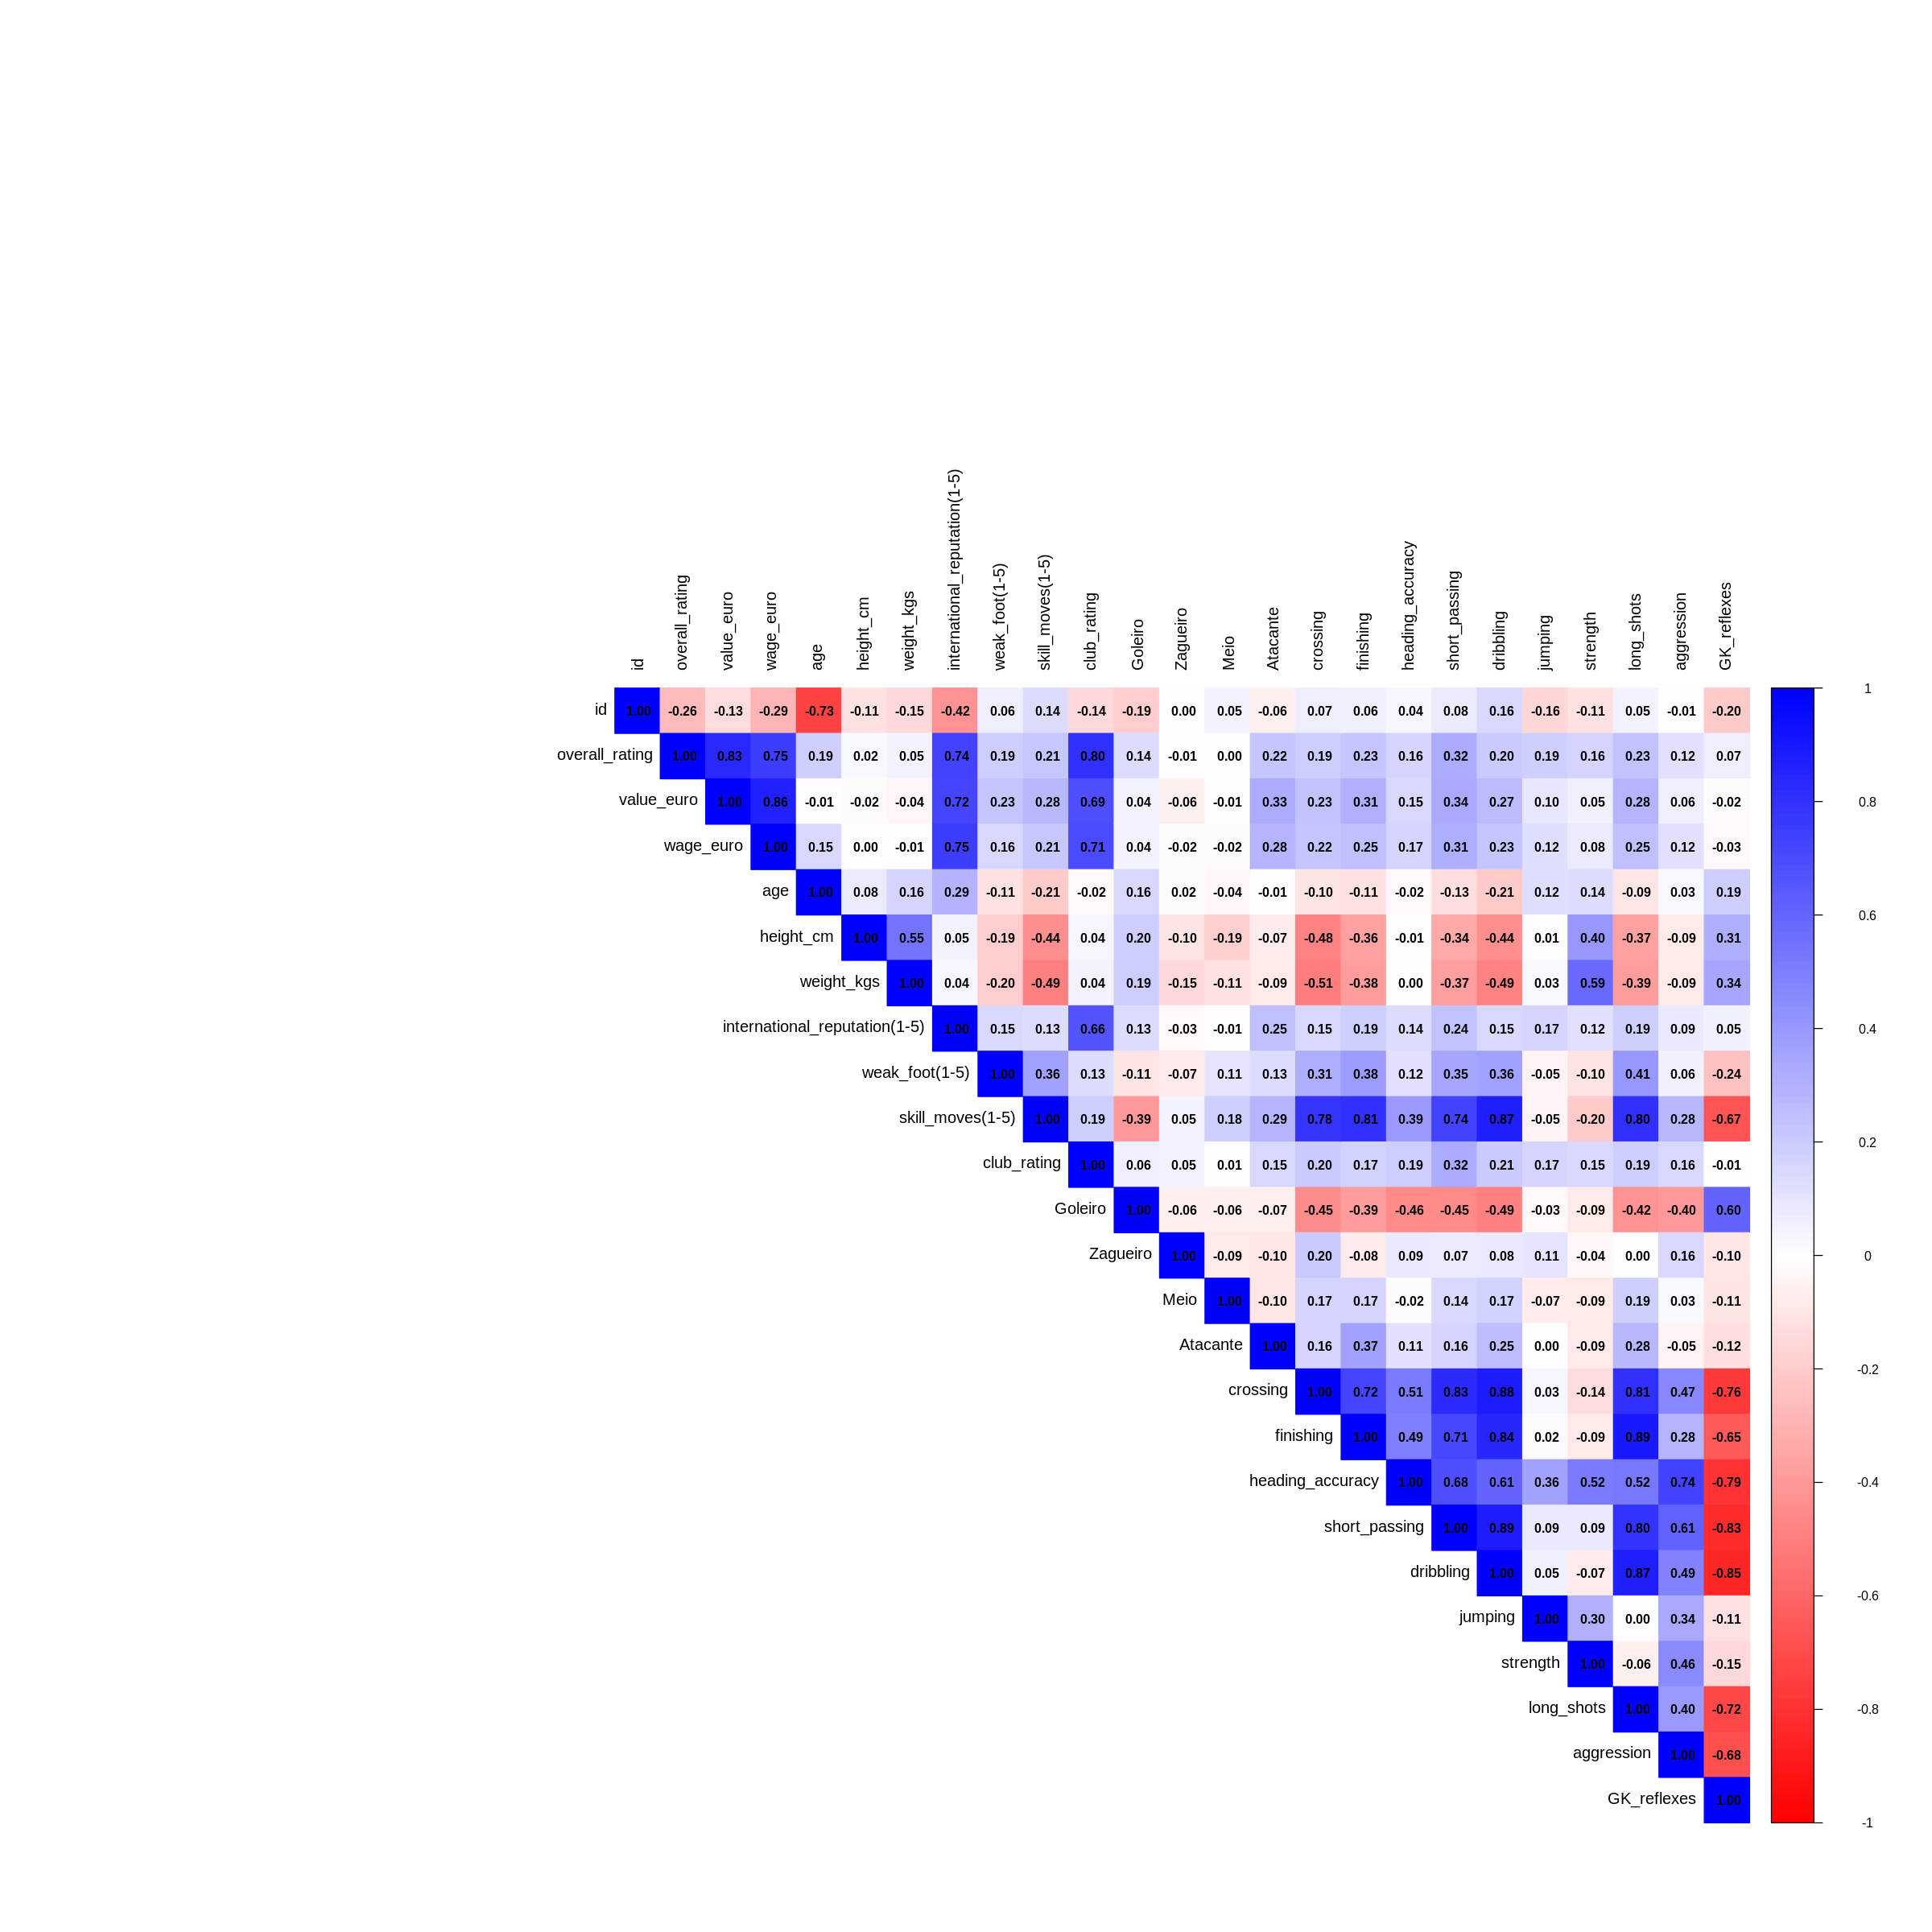

In [ ]:
# Instale o pacote corrplot caso não esteja instalado
if (!requireNamespace("corrplot", quietly = TRUE)) {
  install.packages("corrplot")
}

library(corrplot)

# Selecionar apenas as variáveis numéricas
fifa_numeric <- fifa[sapply(fifa, is.numeric)]

# Calcular a matriz de correlação
cor_matrix <- cor(fifa_numeric, use = "complete.obs")

# Ajustar o tamanho do gráfico
options(repr.plot.width = 20, repr.plot.height = 20)  # Aumentar tamanho no Colab/Notebook

# Exibir um gráfico de calor (heatmap) da matriz de correlação com tamanho maior
corrplot(cor_matrix, method = "color", type = "upper", tl.cex = 1, tl.col = "black",
         addCoef.col = "black", number.cex = 0.8, col = colorRampPalette(c("red", "white", "blue"))(200))


### 4. Regression Analysis (Simple or Multiple) on Variables Chosen by the Author

- **Variable Selection**:
  - The variables were selected based on their correlation with salary (`wage_euro`) and their theoretical relevance to the analysis.

- **Model Approach**:
  - Multiple linear regression was applied to quantify the relationship between player attributes and salary. Significant variables were highlighted, and model fit statistics were evaluated.

- **Key Results**:
  - **Adjusted R²**: The model achieved an adjusted R² of **0.662**, indicating that **66.2% of the salary variation** is explained by the selected variables.
  - **Significant Variables**:
    - **`international_reputation(1-5)`**: Each additional point increases salary by **€32,087.75** (p-value < 2e-16).
    - **`overall_rating`**: Each additional point increases salary by **€5,139.07** (p-value < 2e-16).
    - **`GK_reflexes`**: A decrease of **€511.10** per unit (p-value = 0.0419), highlighting its minor but statistically significant impact.
  - **Non-significant Variables**:
    - Attributes like `crossing`, `finishing`, and `strength` were not statistically significant (p-value > 0.05), suggesting limited direct impact on salary.

- **Interpretation**:
  - The results emphasize the importance of global reputation and overall performance as primary drivers of salary. While individual skills contribute to gameplay, their direct effect on salary is overshadowed by aggregated metrics like reputation and overall rating.
  - The adjusted R² indicates a strong model fit, and the F-statistic of **117.9** (p-value < 2.2e-16) confirms the overall significance of the model.


Resumo do Modelo de Regressão Múltipla com Variáveis Adicionais:



Call:
lm(formula = wage_euro ~ ., data = fifa_habilidades_complementares)

Residuals:
    Min      1Q  Median      3Q     Max 
-102097  -19700     182   18200  318058 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     -336611.33   26414.78 -12.743   <2e-16 ***
crossing                             86.24     159.93   0.539   0.5899    
finishing                           193.04     167.46   1.153   0.2494    
heading_accuracy                   -127.89     183.13  -0.698   0.4852    
short_passing                       -42.50     267.92  -0.159   0.8740    
dribbling                          -249.14     269.19  -0.926   0.3550    
jumping                            -152.14     141.26  -1.077   0.2819    
strength                           -266.05     205.15  -1.297   0.1951    
long_shots                         -171.40     181.70  -0.943   0.3459    
aggression                          -12.07     143.62  -0.084   0.


Diagnóstico do Modelo:
R² ajustado: 0.662 

Coeficientes mais significativos:
                                    Estimate Std. Error    t value     Pr(>|t|)
(Intercept)                     -336611.3333 26414.7826 -12.743294 1.272633e-33
GK_reflexes                        -511.1008   250.7647  -2.038169 4.190574e-02
`international_reputation(1-5)`   32087.7526  2359.7403  13.598002 1.443756e-37
overall_rating                     5139.0711   445.9805  11.523085 2.867860e-28


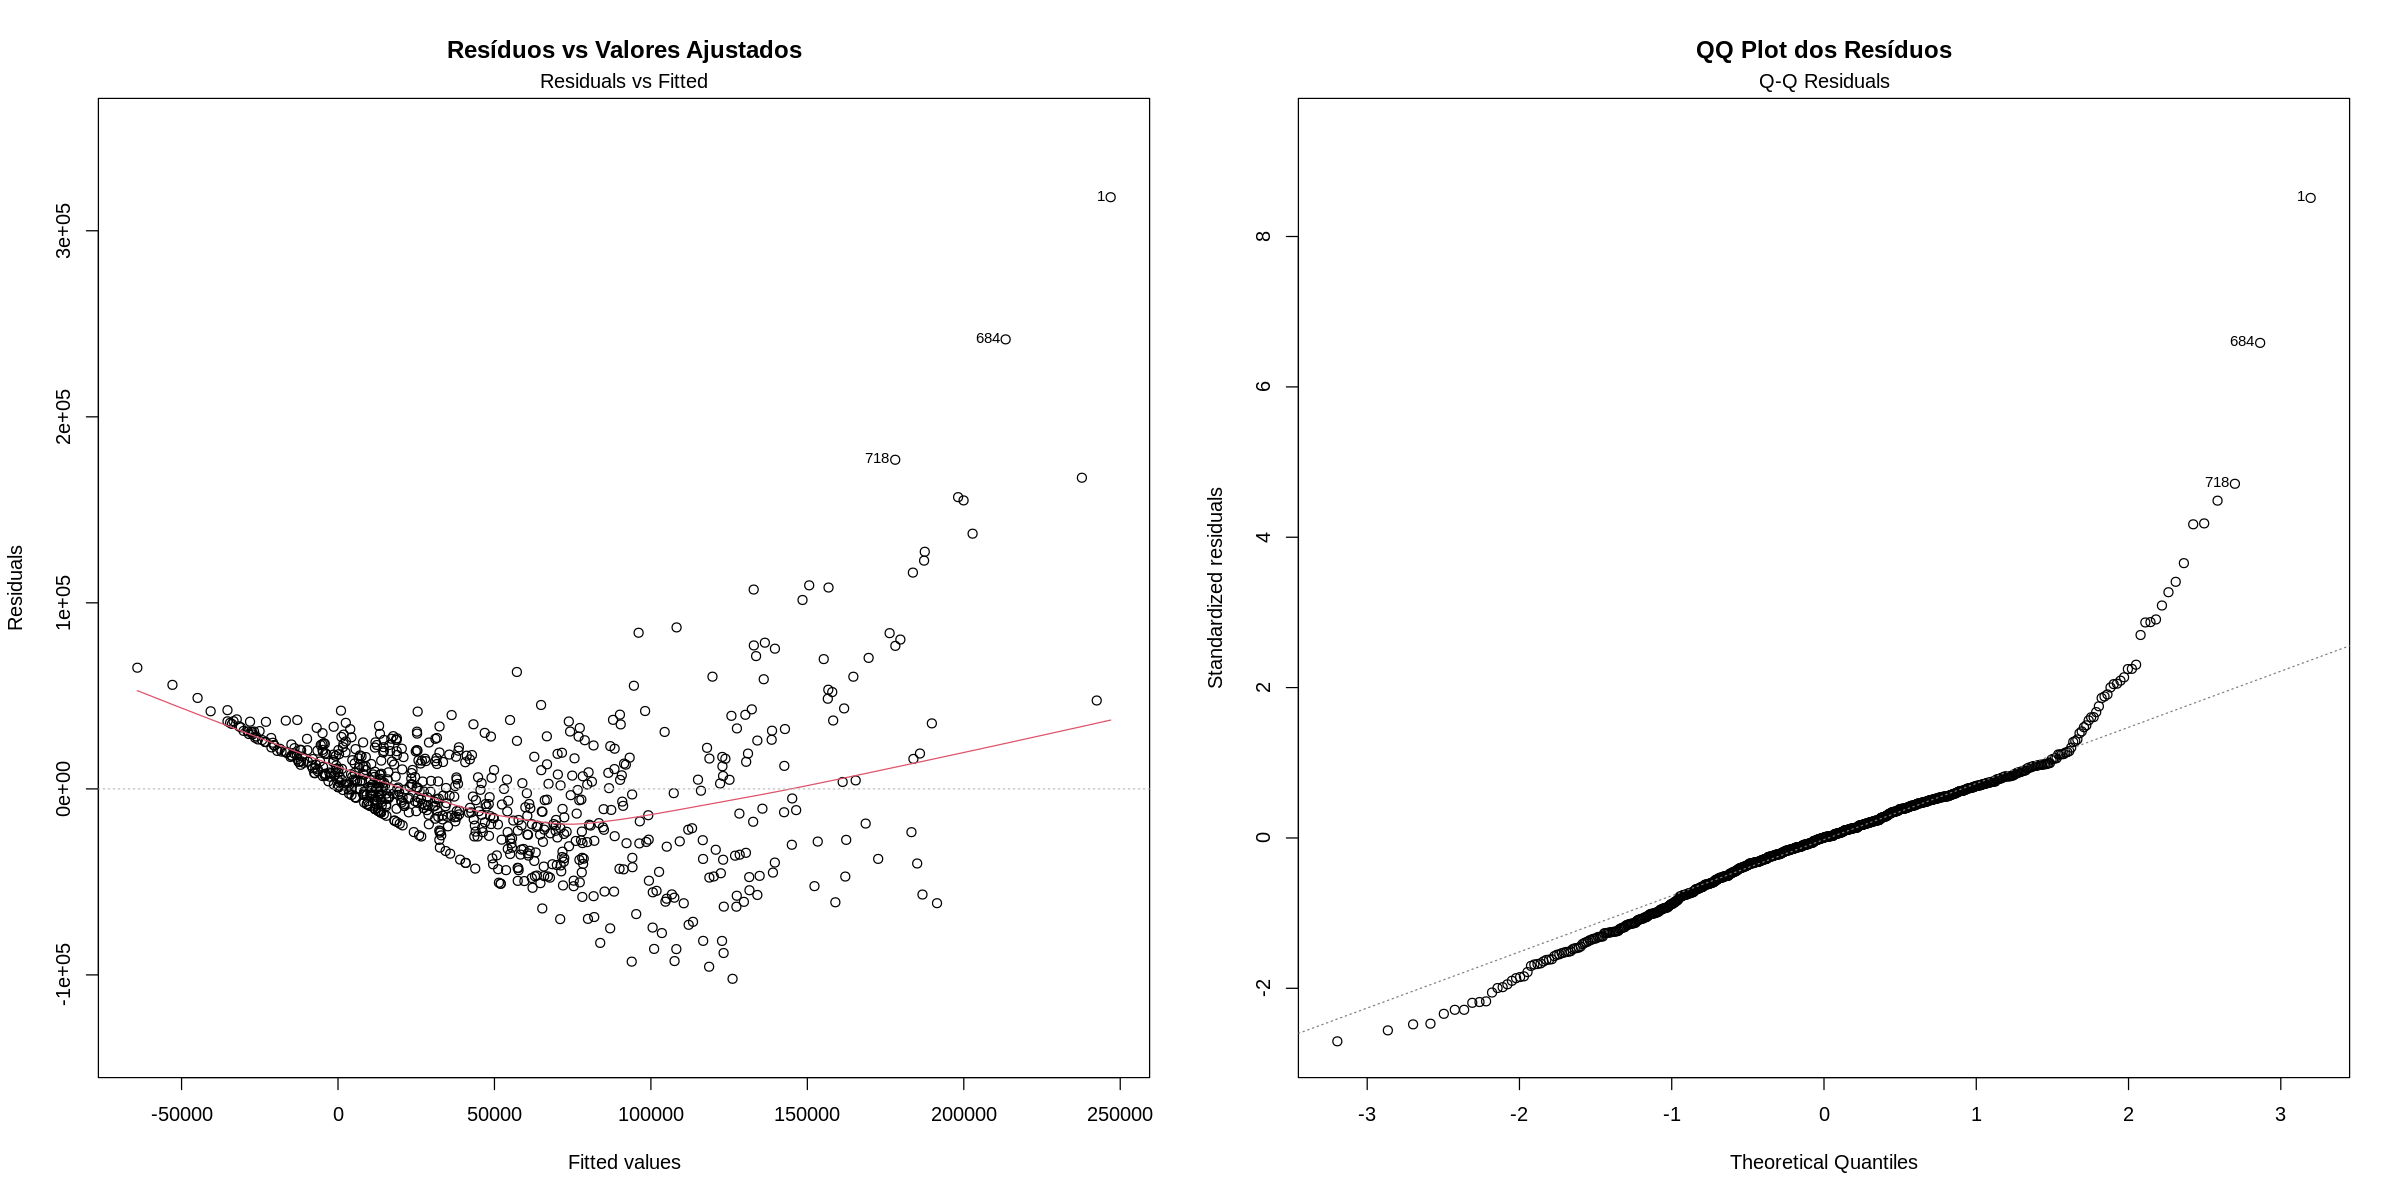

In [ ]:
# Adicionar variáveis "overall_rating" e "international_reputation(1-5)"
habilidades_complementares <- c("crossing", "finishing", "heading_accuracy", "short_passing",
                                "dribbling", "jumping", "strength", "long_shots", "aggression",
                                "GK_reflexes", "international_reputation(1-5)", "overall_rating")

# Filtrar as colunas necessárias (habilidades, reputação, overall e salário)
fifa_habilidades_complementares <- fifa[, c(habilidades_complementares, "wage_euro")]

# Remover valores ausentes (NA)
fifa_habilidades_complementares <- na.omit(fifa_habilidades_complementares)

# Ajustar o modelo de regressão múltipla com as novas variáveis
modelo_habilidades_complementares <- lm(wage_euro ~ ., data = fifa_habilidades_complementares)

# Resumo do modelo atualizado
cat("Resumo do Modelo de Regressão Múltipla com Variáveis Adicionais:\n")
summary(modelo_habilidades_complementares)

# Diagnósticos do modelo
cat("\nDiagnóstico do Modelo:\n")
options(repr.plot.width = 20, repr.plot.height = 10)  # Aumentar tamanho dos gráficos
par(mfrow = c(1, 2))  # Dois gráficos lado a lado
plot(modelo_habilidades_complementares, which = 1, main = "Resíduos vs Valores Ajustados")
plot(modelo_habilidades_complementares, which = 2, main = "QQ Plot dos Resíduos")
par(mfrow = c(1, 1))  # Voltar ao layout padrão

# Exibir o R² ajustado
cat("R² ajustado:", round(summary(modelo_habilidades_complementares)$adj.r.squared, 3), "\n")

# Interpretar os coeficientes mais significativos
cat("\nCoeficientes mais significativos:\n")
significant_vars_complementares <- summary(modelo_habilidades_complementares)$coefficients
significant_vars_complementares <- significant_vars_complementares[significant_vars_complementares[, "Pr(>|t|)"] < 0.05, ]
print(significant_vars_complementares)


### 1. Reputation is Gold: Each Point in International Reputation Increases Salary by €32,087!

- **Model Basis**:
  - The analysis was conducted using **multiple linear regression**, examining the impact of various explanatory variables on salary (`wage_euro`). The variable **`international_reputation(1-5)`** had the highest coefficient in the model, with **€32,087.75** per additional point and a **p-value < 2e-16**, indicating high statistical significance.
  - The **confidence interval** confirms that the impact of reputation is consistent and not random.

- **Model Fit Statistics**:
  - The model presented an **adjusted R² of 0.662**, showing that **66.2% of salary variation** can be explained by the model's variables, with `international_reputation(1-5)` as the most influential.
  - The overall model analysis was significant, with an **F-statistic of 117.9** and a p-value < 2.2e-16.

- **Explanation**:
  - International reputation reflects a player's global influence and prestige. Highly recognized players on the world stage are valued not only for their on-field performance but also as marketing assets, directly impacting their salaries.

---

### 2. Overall Rating Counts: One Point in Overall Rating Adds €5,139 to Players' Pockets.

- **Model Basis**:
  - The analysis was performed using **multiple linear regression**, evaluating the impact of several explanatory variables (skills and attributes) on salary (`wage_euro`). The coefficient for **`overall_rating`** in the model was **€5,139.07**, with a **p-value < 2e-16**, indicating that this variable's impact is statistically significant.
  - The **confidence interval for the `overall_rating` coefficient** confirms the robustness of the effect, showing that the estimated impact is far from random.

- **Explanation**:
  - The overall rating (`overall_rating`) is a global index of player performance, consolidating their skills and attributes. This index directly reflects market value and salary, as shown by the statistical model. Players with higher scores tend to be better compensated.

---

### 3. Skills Aren't Everything: Salary Depends More on Reputation and Overall Performance.

- **Model Basis**:
  - Although specific skills like `crossing`, `finishing`, and `strength` are important, they did not show statistical significance in the model (p > 0.05). In contrast, aggregated variables like **`international_reputation(1-5)`** and **`overall_rating`** explained most of the salary variation.

- **Model Fit Statistics**:
  - The model demonstrated high reliability, with an **F-statistic of 117.9** (p-value < 2.2e-16). The coefficients for `international_reputation(1-5)` (**€32,087.75**) and `overall_rating` (**€5,139.07**) highlighted their relevance.

- **Explanation**:
  - While skills are crucial for on-field performance, it is the combination of global reputation and overall performance that truly dictates salary. Players with greater visibility and consistently high performance tend to command significantly higher salaries.
